# Query

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 29985;

# 1 - Perkenalan

Nama      : Immanuel Yosia Alfrenco

Batch     : FTDS-015

Dataset   : Data Credit Card Taiwan

Objective : Buatlah model Classification untuk memprediksi `default_payment_next_month` menggunakan dataset yang sudah kalian simpan.


# 2 - Import Libraries

In [1]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Untuk membuat model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Untuk evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# 3 - Data Loading

In [3]:
# Import data yang akan digunakan

data_ori = pd.read_csv('h8dsft_P1M1_immanuel_yosia_alfrenco.csv')

In [4]:
# Duplikasi dataset untuk backup

data = data_ori.copy()

In [5]:
# Code supaya dataframe menampilkan semua column
pd.set_option('display.max_columns', None)

In [6]:
# Mengecek head

data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [7]:
# Mengecek tail

data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
# check dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Data yang akan digunakan ternyata memiliki 24 kolom dimana semuanya bertipe numeric.

In [9]:
# Melakukan rename column

data = data.rename(columns={'pay_0':'pay_1'})
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


# 4 - Exploratory Data Analysis (EDA)

## Numerical Data Summary

In [10]:
# check dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_1,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


## Age

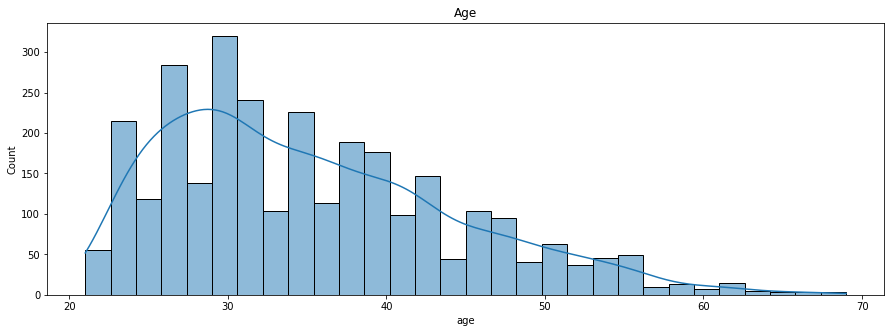

Age Skewness value :  0.7728871800647299
Min Age : 21.0
Max Age : 69.0
Mean Age : 35.19325463743676


In [11]:
plt.figure(figsize = (15, 5))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age')
plt.show()
print('Age Skewness value : ', data['age'].skew())
print(f'Min Age : {data.age.min()}')
print(f'Max Age : {data.age.max()}')
print(f'Mean Age : {data.age.mean()}')

Visual di atas menunjukan bahwa koresponden paling banyak berumur 30 tahun dengan umur terkecil adalah 21 tahun dan yang tertua adalah 69 tahun dimana rata-ratanya adalah 35 tahun.

## Limit Balance

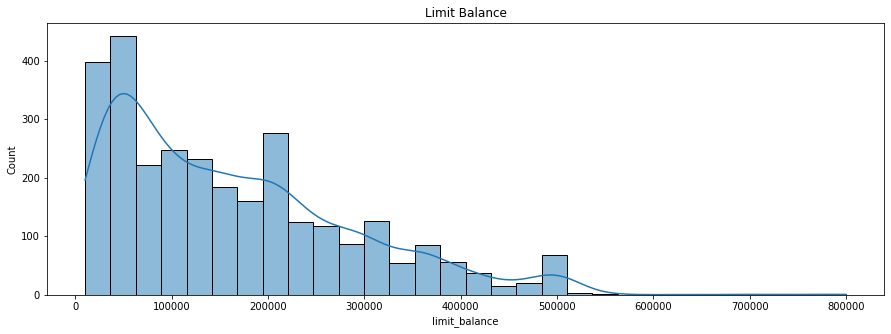

Limit Balance Skewness value :  1.0004416437793329
Min Limit : 10000.0
Max Limit : 800000.0


In [12]:
plt.figure(figsize = (15, 5))
sns.histplot(data['limit_balance'], bins=30, kde=True)
plt.title('Limit Balance')
plt.show()
print('Limit Balance Skewness value : ', data['limit_balance'].skew())
print(f'Min Limit : {data.limit_balance.min()}')
print(f'Max Limit : {data.limit_balance.max()}')

Visual di atas menunjukan bahwa kebanyakan orang pada data kita memiliki limit credit card sebanyak 50.000 dollar walaupun ada juga orang yang memiliki limit lebih tinggi. Visual di atas juga menunjukan bahwa semakin tinggi limit credit card maka semakin sedikit orangnya dimana kemungkinan orang yang memiliki limit tinggi hanya orang-orang yang kaya.

## Education

Education Level 
1. graduate school
2. university
3. high school
4. others
5. unknown
6. unknown

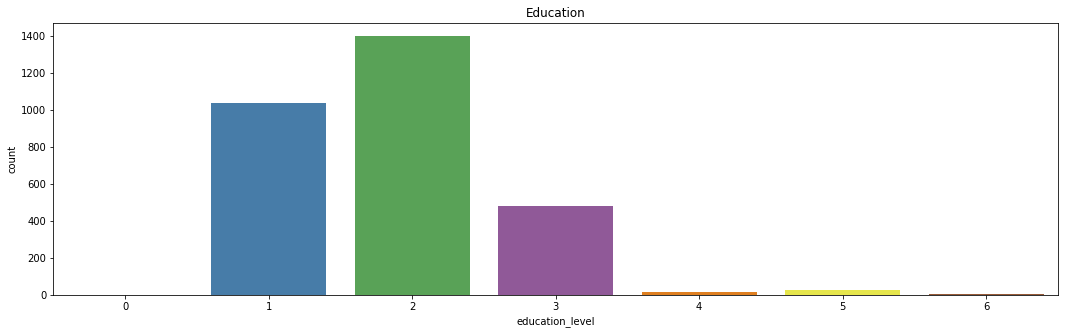

In [13]:
plt.figure(figsize=(18,5))
sns.countplot(x='education_level', data=data, palette='Set1')
plt.title('Education')
plt.show()

In [14]:
edu2 = data['education_level'].value_counts()[2]
100*(edu2/(len(data)))

47.217537942664414

Mayoritas koresponden dalam data kita sebanyak 47% teryata merupakan lulusan sarjana/S1. Setelah itu jumlahnya diikuti oleh lulusan S2 dan selanjutnya adalah lulusan SMA.

## Marital Status

Marital status 
1. married
2. single
3. others

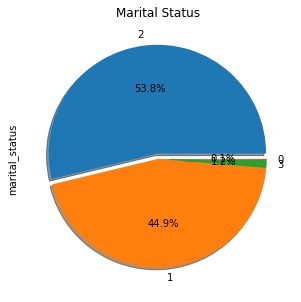

In [15]:
plt.figure(figsize=(5,5))
data['marital_status'].value_counts().plot(kind='pie', explode=[0.05, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.title('Marital Status')
plt.show()

Sebanyak **53.8%** koresponden pada data kita ternyata berstatus **single**, artinya di Taiwan, kebanyakan orang yang belum berkeluargalah yang memiliki kartu kredit. Data juga menunjukan bahwa **44.9%** koresponden dalam data kita dalam status **pernikahan** dimana sisanya tidak diketahui statusnya.

## Gender

Gender 
1. male
2. female

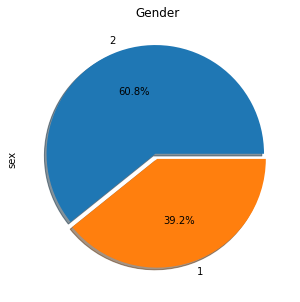

In [16]:
plt.figure(figsize=(5,5))
data['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True)
plt.title('Gender')
plt.show()

Visual di atas menunjukan bahwa 60.8% responden adalah wanita, dan 39.2% sisanya adalah pria. Data tersebut menunjukan bahwa wanita lebih banyak menggunakan kartu kredit dibandingkan dengan pria.

## Repayment Status

Column :
* pay_1 = Repayment status in September, 2005
* pay_2 = Repayment status in August, 2005
* pay_3 = Repayment status in July, 2005
* pay_4 = Repayment status in June, 2005
* pay_5 = Repayment status in May, 2005
* pay_6 = Repayment status in April, 2005

Repayment status : 
* -2 = no consumption
* -1 = pay duly
* 0 = the use of revolving credit
* 1 = payment delay for one month
* 2 = payment delay for two months
* 3 = payment delay for two months
* 4 = payment delay for two months
* 5 = payment delay for two months
* 6 = payment delay for two months
* 7 = payment delay for two months
* 8 = payment delay for eight months
* 9 = payment delay for nine months and above

In [17]:
data[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].mode()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.0,0.0,0.0,0.0,0,0


Data di atas menunjukan bahwa dari bulan April hingga September 2005 kebanyakan orang memiliki status payment **the use of revolving credit**

## Bill Amount

Column : 
* bill_amt_1 = Amount of bill statement in September, 2005 (NT dollar)
* bill_amt_2 = Amount of bill statement in August, 2005 (NT dollar)
* bill_amt_3 = Amount of bill statement in July, 2005 (NT dollar)
* bill_amt_4 = Amount of bill statement in June, 2005 (NT dollar)
* bill_amt_5 = Amount of bill statement in May, 2005 (NT dollar)
* bill_amt_6 = Amount of bill statement in April, 2005 (NT dollar)

In [18]:
# Coba memisahkan default payment

df_yes = data[data['default_payment_next_month']==1]
df_no = data[data['default_payment_next_month']==0]

In [19]:
df_yes[['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']].describe()

,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,51292.557480,50768.069291,48099.437795,43530.267717,41617.867717,40444.259843
std,74791.258166,73351.573987,69108.870453,61547.969881,59661.726418,57110.365343
min,-200.000000,-474.000000,-25443.000000,-46627.000000,-46627.000000,-46627.000000
25%,4555.500000,4320.500000,4550.500000,3996.500000,2500.000000,2500.000000
50%,24003.000000,24181.000000,22231.000000,20508.000000,20085.000000,19439.000000
75%,66992.000000,63190.500000,60815.500000,55885.500000,50351.000000,50596.500000
max,613860.000000,512650.000000,578971.000000,384981.000000,395430.000000,384825.000000


In [20]:
df_no[['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']].describe()

,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000
mean,52343.348069,50616.744635,48277.999142,44242.142060,40775.722318,39590.152361
std,71657.673301,70085.367410,67895.788090,62017.344751,57899.069439,57366.875789
min,-11545.000000,-67526.000000,-9850.000000,-27490.000000,-7941.000000,-73895.000000
25%,3830.250000,3153.500000,3096.750000,2369.000000,1762.000000,1296.250000
50%,24413.000000,22825.500000,21300.000000,19343.500000,18300.500000,17988.000000
75%,70468.750000,68082.250000,63727.250000,61304.250000,54064.000000,53043.750000
max,533142.000000,504834.000000,559712.000000,488808.000000,441981.000000,436172.000000


Kita bisa lihat rata-rata tagihan pada orang yang mampu membayar cicilan bulan depan dan yang tidak ternyata tidak berbeda jauh. 

## Payment Amount

Column : 
* pay_amt_1 = Amount of previous payment in September, 2005 (NT dollar)
* pay_amt_2 = Amount of previous payment in August, 2005 (NT dollar)
* pay_amt_3 = Amount of previous payment in July, 2005 (NT dollar)
* pay_amt_4 = Amount of previous payment in June, 2005 (NT dollar)
* pay_amt_5 = Amount of previous payment in May, 2005 (NT dollar)
* pay_amt_6 = Amount of previous payment in April, 2005 (NT dollar)

In [21]:
df_yes[['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].describe()

,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,3702.329134,2994.491339,2681.051969,3195.811024,2792.908661,3166.981102
std,11611.265855,6038.941283,4586.480060,11141.089392,7246.092393,9305.447651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1925.000000,1710.000000,1500.000000,1039.000000,1247.000000,1000.000000
75%,3534.500000,3500.000000,3276.000000,3000.000000,3011.000000,3000.000000
max,235728.000000,84440.000000,46952.000000,159658.000000,109000.000000,100000.000000


In [22]:
df_no[['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].describe()

,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2330.000000,2.330000e+03,2330.000000,2330.000000,2330.000000,2330.000000
mean,7070.179399,7.165856e+03,5823.500429,4933.536481,5491.157940,5986.556652
std,22715.986557,3.236942e+04,15872.360902,13786.119780,18453.652701,18829.705506
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1212.250000,1.099250e+03,626.000000,391.750000,390.000000,327.000000
50%,2500.000000,2.481000e+03,2000.000000,1895.000000,1807.500000,1915.000000
75%,5842.000000,5.593000e+03,5000.000000,4500.000000,4516.750000,4725.500000
max,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


Kita bisa lihat rata-rata jumlah pembayaran sebelumnya tiap bulan untuk label no lebih tinggi setiap bulan dibandingkan dengan label yes, artinya orang yang membayar lebih tinggi tiap bulan malah berkemungkinan untuk tidak bisa membayar bulan depannya.

## Default Payment Next Month (Target)

Default payment 
* 1 = yes 
* 0 = no

In [23]:
# Mencoba melihat jumlah target

data['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

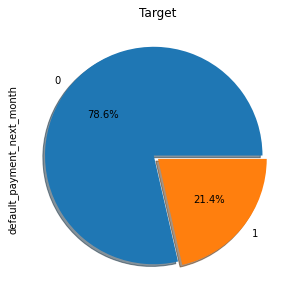

In [24]:
plt.figure(figsize=(5,5))
data['default_payment_next_month'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True)
plt.title('Target')
plt.show()

Dari data di atas kita bisa lihat bahwa 2330 orang atau 78.6% orang Taiwan mampu membayar tagihan credit card untuk bulan depan dan sisanya 21.4% gagal membayar tagihan untuk bulan depan. Hal ini menunjukan bahwa masih banyak orang Taiwan yang mampu melunasi tagihan kartu kreditnya. Hal ini juga menunjukan bahwa data terget kita imbalance atau tidak seimbang.

## Correlation Between Columns

Selanjutnya kita ingin mengecek korelasi antar column.

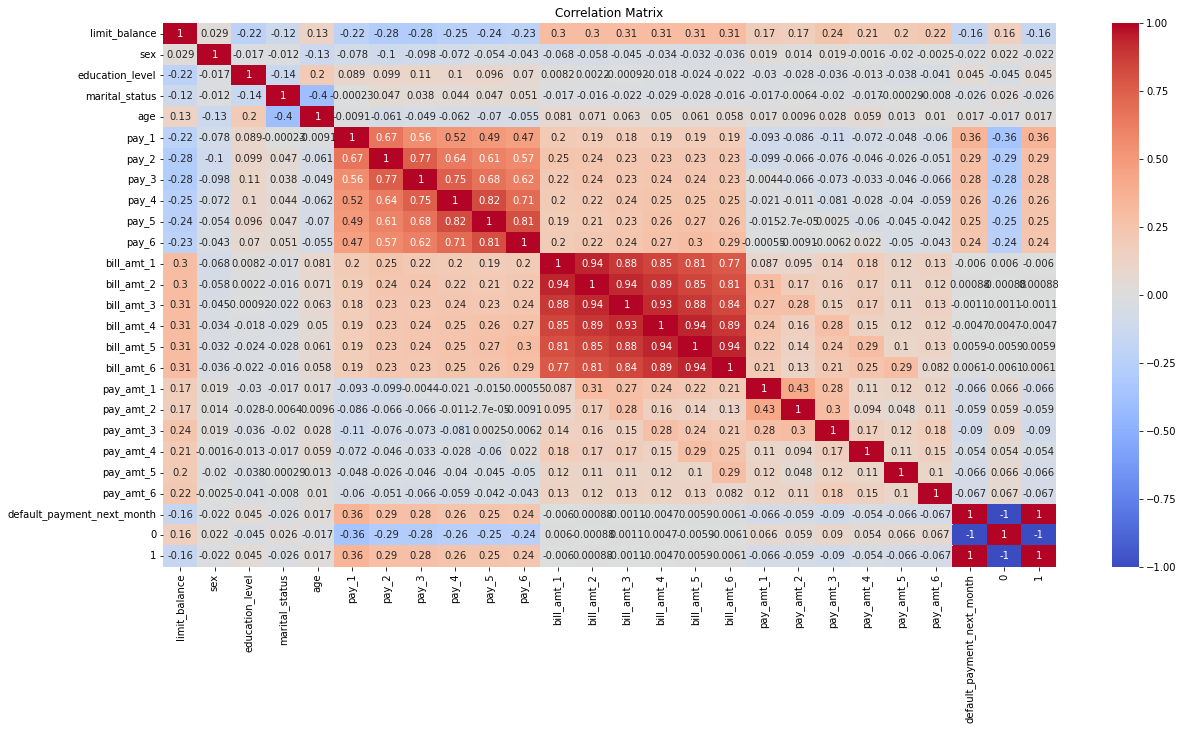

In [25]:
corr1 = pd.concat([data, pd.get_dummies(data['default_payment_next_month'])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap di atas kita bisa melihat bahwa `default_payment_next_month` memiliki korelasi dengan kolom beberapa kolom, namun yang memiliki nilai di atas 0.1/-0.1 hanya `limit_balance` dan `pay`. Namun karna kolom yang berkorelasi hanya sedikit saya akan menurunkan standar korelasi dan memilih semua kolom kecuali `bill_amt`.

# 5 - Data Preprocessing

## Get data for model inference

In [26]:
# Membuat data inference

data_inf = data.sample(10, random_state=17)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
91,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,0,211688.0,205003.0,203118.0,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
325,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,0,10343.0,11069.0,12082.0,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
47,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,0,14019.0,15780.0,18519.0,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
1488,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,0,34244.0,32193.0,10803.0,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
446,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,0,9970.0,7699.0,9479.0,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
567,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,0,93738.0,84636.0,88446.0,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
1473,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,-1,504644.0,512650.0,0.0,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
548,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,-1,26088.0,24092.0,24488.0,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
1768,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,0,40029.0,41095.0,40137.0,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
1781,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,2,28967.0,30776.0,33071.0,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


In [27]:
# Menghapus inference set dari dataset awal

data = data.drop(data_inf.index)
data

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [28]:
# Reset index pada data Inference dan data awal agar tidak terjadi error

data_inf.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,0,211688.0,205003.0,203118.0,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,0,10343.0,11069.0,12082.0,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,0,14019.0,15780.0,18519.0,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,0,34244.0,32193.0,10803.0,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,0,9970.0,7699.0,9479.0,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,0,93738.0,84636.0,88446.0,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,-1,504644.0,512650.0,0.0,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,-1,26088.0,24092.0,24488.0,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,0,40029.0,41095.0,40137.0,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,2,28967.0,30776.0,33071.0,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


## Splitting Between Train-Set and Test-Set

Kita akan memisahkan data menjadi Train-Set dan juga Test-Set

In [29]:
# Memisahkan `X` (Features) and `y` (Targets)

X = data.drop('default_payment_next_month', axis=1)
y = data['default_payment_next_month']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=data.default_payment_next_month)

print("Train Size : ", X_train.shape)
print("Test Size : ", X_test.shape)

Train Size :  (2364, 23)
Test Size :  (591, 23)


## Handling Missing Values

Kita akan melakukan check Missing Values pada Train Set dan Test Set

### Train_set

In [31]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [32]:
y_train.isnull().sum()

0

Kita bisa melihat bahwa tidak ada missing values pada Train Set, selanjutnya kita akan mengecek Test-Set.

### Test-Set

In [33]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [34]:
y_test.isnull().sum()

0

Kita bisa melihat bahwa pada Test-Set juga tidak ada missing values, maka kita bisa melanjutkan ke tahap selanjutnya.

## Handling Outliers

### Check Distribution

Sebelum menentukan metode handling outliers, kita harus mengetahui tipe distribusi dari data kita.

In [35]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable, 'skewness value : ', df[variable].skew())

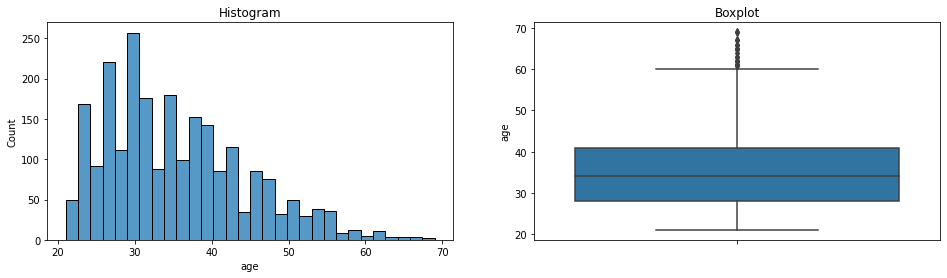

age skewness value :  0.7618747809696877


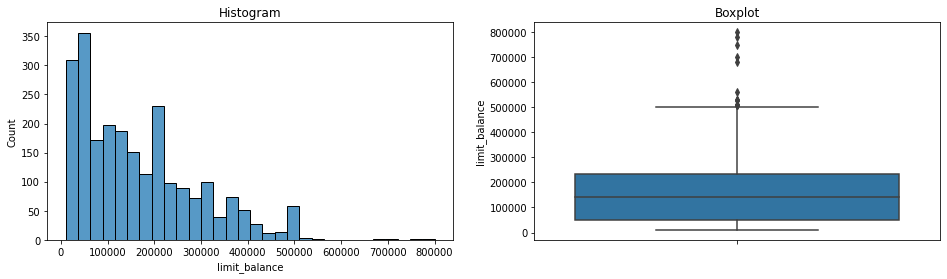

limit_balance skewness value :  1.0115729839271905


In [36]:
diagnostic_plots(X_train, 'age')
diagnostic_plots(X_train, 'limit_balance')

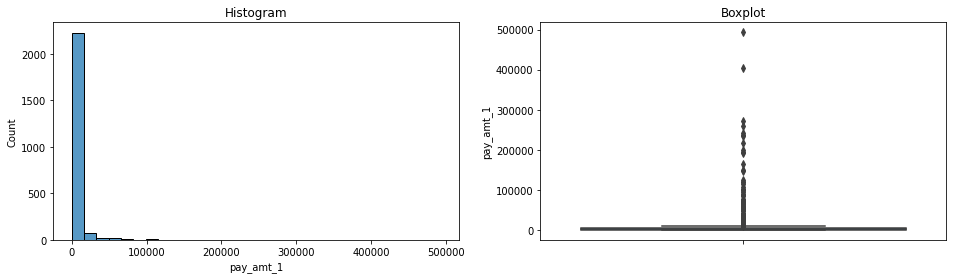

pay_amt_1 skewness value :  11.636983757456186


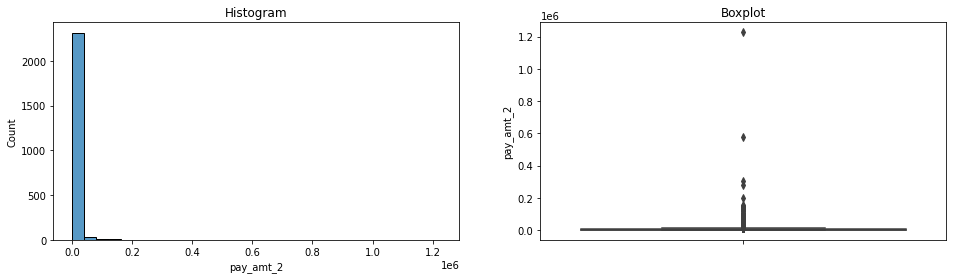

pay_amt_2 skewness value :  27.220048406734247


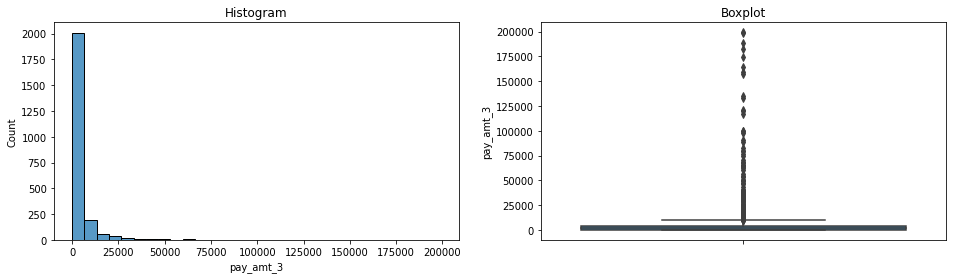

pay_amt_3 skewness value :  8.147893113871639


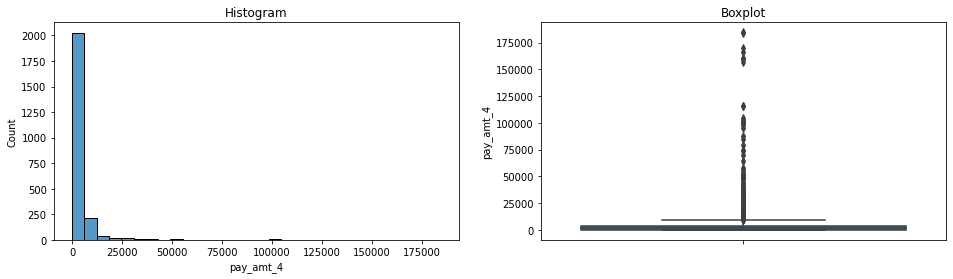

pay_amt_4 skewness value :  8.301442888050447


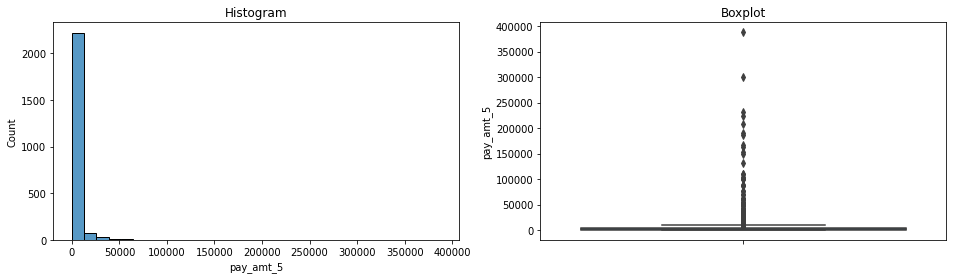

pay_amt_5 skewness value :  11.250403590898369


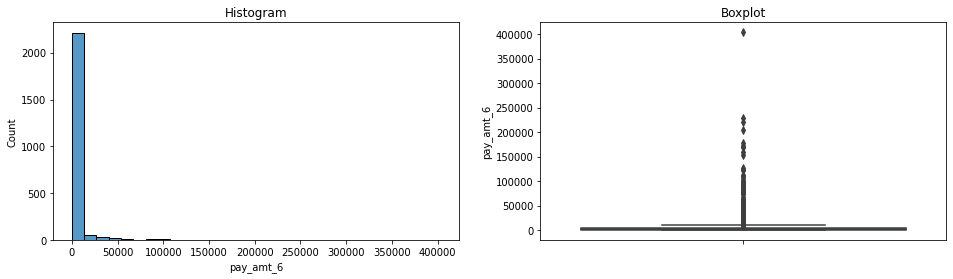

pay_amt_6 skewness value :  9.82978942552478


In [37]:
diagnostic_plots(X_train, 'pay_amt_1')
diagnostic_plots(X_train, 'pay_amt_2')
diagnostic_plots(X_train, 'pay_amt_3')
diagnostic_plots(X_train, 'pay_amt_4')
diagnostic_plots(X_train, 'pay_amt_5')
diagnostic_plots(X_train, 'pay_amt_6')

Semua kolom di atas memiliki outliers yang akan kita handling, namun kita akan melakukan handling sesuai dengan tipe distribusi datanya. Karena semua kolom bertipe skewed maka akan kita handling menggunakan *IQR*


### Capping

In [38]:
# Membuat capper IQR

windsoriser_iqr = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['age', 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

windsoriser_iqr.fit(X_train)

X_train_capped = windsoriser_iqr.transform(X_train)
X_test_capped = windsoriser_iqr.transform(X_test)

In [39]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser_iqr.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser_iqr.right_tail_caps_)

Left Tail Caps  :  {'age': 8.5, 'limit_balance': -223750.0, 'pay_amt_1': -5113.625, 'pay_amt_2': -5052.25, 'pay_amt_3': -5416.5, 'pay_amt_4': -5252.5, 'pay_amt_5': -5394.625, 'pay_amt_6': -5787.75}
Right Tail Caps :  {'age': 60.5, 'limit_balance': 506250.0, 'pay_amt_1': 11189.375, 'pay_amt_2': 11031.75, 'pay_amt_3': 10145.5, 'pay_amt_4': 9551.5, 'pay_amt_5': 9664.375, 'pay_amt_6': 10048.25}


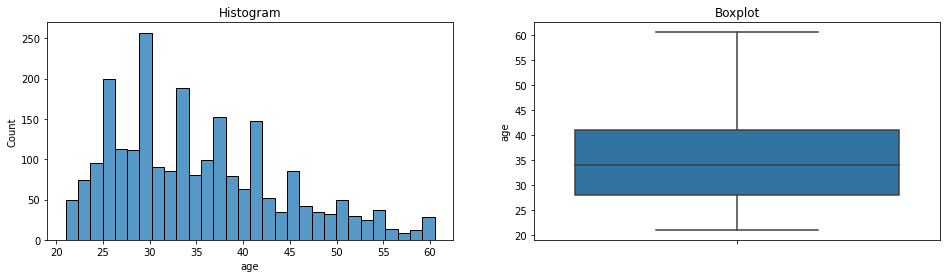

age skewness value :  0.6982936063342278


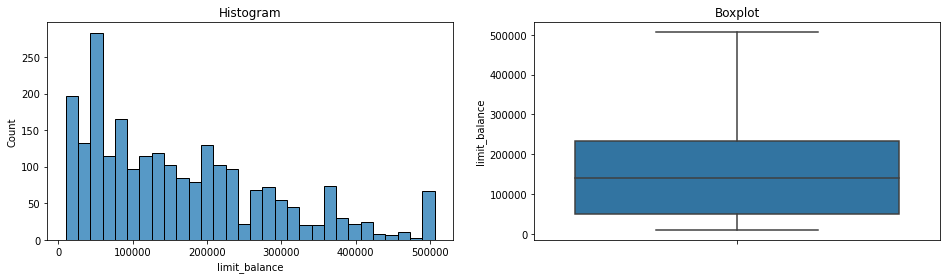

limit_balance skewness value :  0.8903199641992617


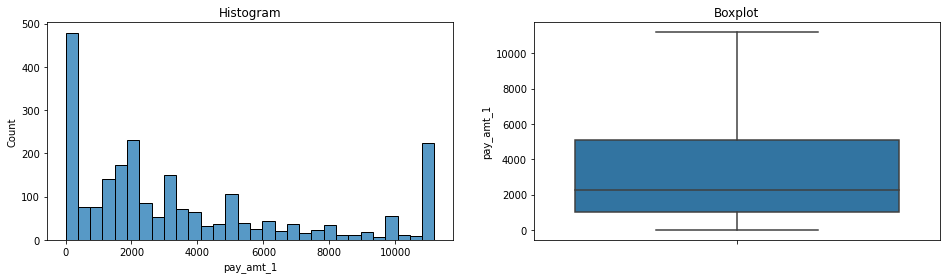

pay_amt_1 skewness value :  1.0030524254031399


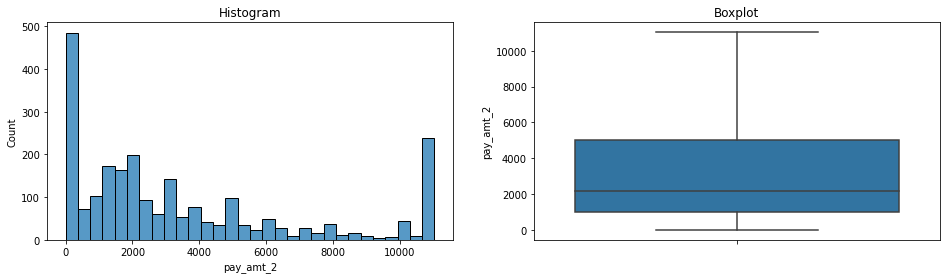

pay_amt_2 skewness value :  1.0421178602759051


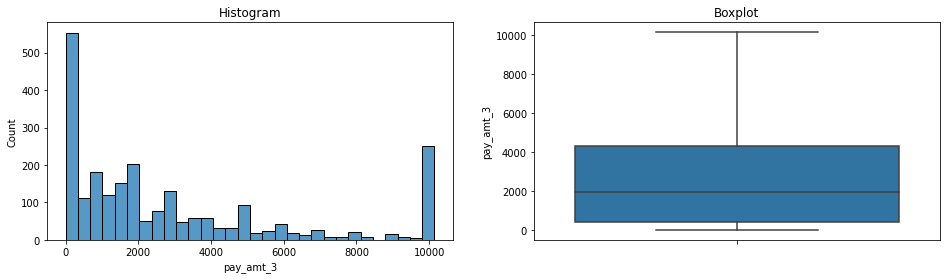

pay_amt_3 skewness value :  1.1679713805522391


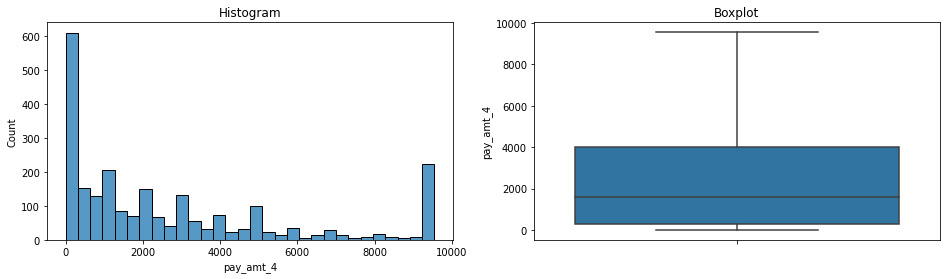

pay_amt_4 skewness value :  1.175340959857374


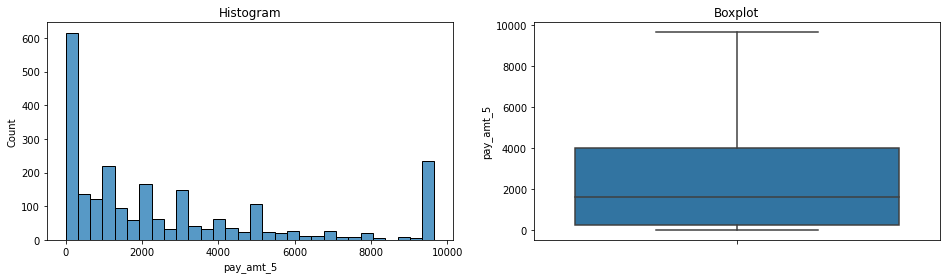

pay_amt_5 skewness value :  1.1877895980567776


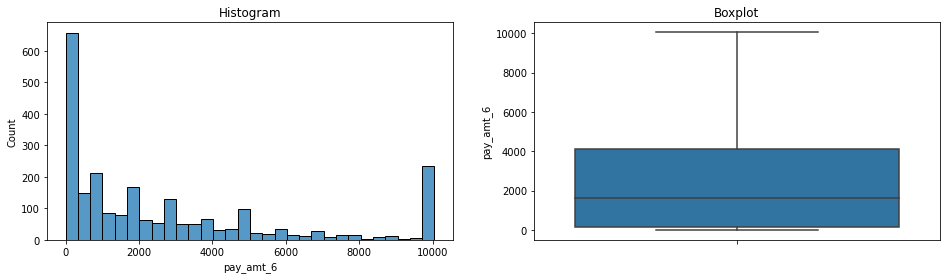

pay_amt_6 skewness value :  1.2073092736091353


In [40]:
diagnostic_plots(X_train_capped, 'age')
diagnostic_plots(X_train_capped, 'limit_balance')
diagnostic_plots(X_train_capped, 'pay_amt_1')
diagnostic_plots(X_train_capped, 'pay_amt_2')
diagnostic_plots(X_train_capped, 'pay_amt_3')
diagnostic_plots(X_train_capped, 'pay_amt_4')
diagnostic_plots(X_train_capped, 'pay_amt_5')
diagnostic_plots(X_train_capped, 'pay_amt_6')

Sekarang sudah tidak ada lagi outliers pada kolom-kolom tersebut.

## Features Selection

Kita akan memilih feature yang akan digunakan dengan sesuai perhitungan korelasi antar kolom dan juga personal judgement yang sudah dilakukan di EDA.

In [41]:
X_train_ = X_train_capped.drop(columns=['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'])
X_test_ = X_test_capped.drop(columns=['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'])


In [42]:
X_train_

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
600,50000.0,1,2,2,41.0,0.0,0.0,0.0,0.0,0,0,2000.0,3000.0,1729.0,1597.0,2000.000,1709.00
2131,30000.0,1,2,1,32.0,-2.0,-2.0,-2.0,-2.0,-2,-2,6367.0,2115.0,5933.0,4192.0,0.000,0.00
458,140000.0,2,2,2,27.0,0.0,0.0,0.0,0.0,0,0,6000.0,4000.0,4000.0,3000.0,4000.000,4000.00
120,180000.0,2,3,1,35.0,0.0,0.0,0.0,0.0,0,2,7002.0,1807.0,2000.0,4000.0,0.000,10048.25
1801,70000.0,2,1,2,34.0,2.0,2.0,2.0,2.0,2,2,0.0,4000.0,2000.0,2000.0,2000.000,2000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,10000.0,1,2,2,23.0,-1.0,-1.0,0.0,-1.0,-1,-1,6007.0,1000.0,390.0,0.0,780.000,0.00
647,230000.0,2,3,1,47.0,0.0,0.0,0.0,0.0,0,0,7000.0,5665.0,4154.0,3300.0,3418.000,3600.00
420,80000.0,2,1,2,26.0,0.0,0.0,0.0,0.0,0,0,3500.0,3300.0,3100.0,2900.0,3200.000,3100.00
2509,50000.0,1,2,1,47.0,-1.0,-1.0,-1.0,2.0,0,-1,390.0,780.0,390.0,0.0,390.000,0.00


Setelah mendapatkan kolom feature yang diinginkan, selanjutkan akan dilakukan scaling dan encoding.

## Split between Numerical Columns and Categorical Columns

In [43]:
# Mendapatkan list Numerical columns dan Categorical columns

num_cols = ['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_cols = ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

print('Numerical Columns : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numerical Columns :  ['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [44]:
# Memisahkan Train-set and Test-set berdasarkan tipe kolomnya

X_train_num = X_train_[num_cols]
X_train_cat = X_train_[cat_cols]

X_test_num = X_test_[num_cols]
X_test_cat = X_test_[cat_cols]

## Features Engineering

Kita akan melakukan scaling dan encoding menggunakan pipeline

Karena semua data kita di atas bertipe skewed, maka akan dilakukan scaling menggunakan MinMaxScaler. Untuk kolom categorical tidak perlu lagi dilakukan encoding karena sudah dalam bentuk encoded, jadi kita akan melakukan *passthrough* pada pipeline.

In [45]:
# Numeric Features Scaling
num_pipe = Pipeline([('scaling', MinMaxScaler())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', 'passthrough', cat_cols)
])

# 6 - Model Definition

Karena kasus kali ini adalah kasus klasifikasi maka kita akan menggunakan model yang khusus untuk klasifikasi dimana kita memilih Logistic Regression, Support Vector Clasifier (SVC), Decision Tree, Random Forest, KNN, Naive Bayes, dan Extreme Gradient Boosting. Semua model tersebut akan kita coba train baselinenya(tidak ada setting parameter).

Kita akan membuat pipeline untuk tiap model untuk mempersingkat proses.

In [46]:
# Logistic Regression Pipeline
log_pipe = Pipeline([('preprocessing', preprocess), ('log', LogisticRegression())])

# Support Vector Machine Pipeline
svc_pipe = Pipeline([('preprocessing', preprocess), ('svc', SVC())])

# Decision Tree Pipeline
dtc_pipe = Pipeline([('preprocessing', preprocess), ('dtc', DecisionTreeClassifier())])

# Random Forest Pipeline
rfc_pipe = Pipeline([('preprocessing', preprocess), ('rfc', RandomForestClassifier())])

# K-Nearest Neighbors Pipeline
knn_pipe = Pipeline([('preprocessing', preprocess), ('knn', KNeighborsClassifier())])

# Naive Bayes Pipeline
nbc_pipe = Pipeline([('preprocessing', preprocess), ('nbc', GaussianNB())])

# Extreme Gradient Boosting Pipeline
xgb_pipe = Pipeline([('preprocessing', preprocess), ('xgb', XGBClassifier())])

# 7 - Model Training

In [47]:
# Training model

%time log_pipe.fit(X_train_, y_train)
%time svc_pipe.fit(X_train_, y_train)
%time dtc_pipe.fit(X_train_, y_train)
%time rfc_pipe.fit(X_train_, y_train)
%time knn_pipe.fit(X_train_, y_train)
%time nbc_pipe.fit(X_train_, y_train)
%time xgb_pipe.fit(X_train_, y_train)

CPU times: user 47.9 ms, sys: 29.9 ms, total: 77.8 ms
Wall time: 43.7 ms
CPU times: user 254 ms, sys: 108 ms, total: 362 ms
Wall time: 243 ms
CPU times: user 29.7 ms, sys: 0 ns, total: 29.7 ms
Wall time: 29.6 ms
CPU times: user 491 ms, sys: 4.1 ms, total: 496 ms
Wall time: 494 ms
CPU times: user 7.56 ms, sys: 1.04 ms, total: 8.59 ms
Wall time: 8.26 ms
CPU times: user 10.1 ms, sys: 48 µs, total: 10.1 ms
Wall time: 9.59 ms
CPU times: user 212 ms, sys: 12 ms, total: 224 ms
Wall time: 224 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('cat', 'passthrough',
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_1',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('xgb', XGBClassifier())])

Kita bisa melihat waktu training yang dibutuhkan untuk train tiap model. Waktu untuk train model tidak ada yang lama mungkin karena kita menggunakan pipeline, dan juga kita tidak melakukan setting hyperparameter apapun.

# 8 - Model Evaluation

Pertama kita akan coba melihat score dari baseline 7 model yang sudah kita train sebelum memilih hasil yang terbaik untuk dilakukan **Hyperparameter Tuning** menggunakan **Gridsearch**.

## Model Scoring

In [48]:
# Melihat cross_val_score tiap model

scores_log = cross_val_score(log_pipe, X_train_, y_train, cv=10)
scores_svc = cross_val_score(svc_pipe, X_train_, y_train, cv=10)
scores_dtc = cross_val_score(dtc_pipe, X_train_, y_train, cv=10)
scores_rfc = cross_val_score(rfc_pipe, X_train_, y_train, cv=10)
scores_knn = cross_val_score(knn_pipe, X_train_, y_train, cv=10)
scores_nbc = cross_val_score(nbc_pipe, X_train_, y_train, cv=10)
scores_xgb = cross_val_score(xgb_pipe, X_train_, y_train, cv=10)

In [49]:
print('----Logistic Regression----')
print(f'Log Mean : {scores_log.mean()}')
print(f'Log Std : {scores_log.std()}')
print('')
print('----SVC----')
print(f'SVC Mean : {scores_svc.mean()}')
print(f'SVC Std : {scores_svc.std()}')
print('')
print('----Decision Tree----')
print(f'DT Mean : {scores_dtc.mean()}')
print(f'DT Std : {scores_dtc.std()}')
print('')
print('----Random Forest----')
print(f'RF Mean : {scores_rfc.mean()}')
print(f'RF Std : {scores_rfc.std()}')
print('')
print('----KNN----')
print(f'KNN Mean : {scores_knn.mean()}')
print(f'KNN Std : {scores_knn.std()}')
print('')
print('----Naive Bayes----')
print(f'NB Mean : {scores_nbc.mean()}')
print(f'NB Std : {scores_nbc.std()}')
print('')
print('----XGB----')
print(f'XGB Mean : {scores_xgb.mean()}')
print(f'XGB Std : {scores_xgb.std()}')
print('')

----Logistic Regression----
Log Mean : 0.8206536508617608
Log Std : 0.01572094519251714

----SVC----
SVC Mean : 0.8392762640348994
SVC Std : 0.017554528501956365

----Decision Tree----
DT Mean : 0.741107058571122
DT Std : 0.01977793455867782

----Random Forest----
RF Mean : 0.8261442465851392
RF Std : 0.02230349520870347

----KNN----
KNN Mean : 0.8104966745333622
KNN Std : 0.019949494610198883

----Naive Bayes----
NB Mean : 0.796556532932847
NB Std : 0.02453611722845191

----XGB----
XGB Mean : 0.8333315454480441
XGB Std : 0.013015793731669384



Kita bisa melihat bahwa model baseline SVC mendapatkan nilai mean dari 10 cross validation tertinggi yaitu 0.839 dan nilai std yang relatif rendah yaitu 0.017, namun masih kalah rendah dengan model XGB yaitu 0.013.

In [50]:
# Mencari accuracy score
print('----Training Set----')
print('Log acc score : ', accuracy_score(y_train, log_pipe.predict(X_train_)))
print('SVC acc score : ', accuracy_score(y_train, svc_pipe.predict(X_train_)))
print('DTC acc score : ', accuracy_score(y_train, dtc_pipe.predict(X_train_)))
print('RFC acc score : ', accuracy_score(y_train, rfc_pipe.predict(X_train_)))
print('KNN acc score : ', accuracy_score(y_train, knn_pipe.predict(X_train_)))
print('NBC acc score : ', accuracy_score(y_train, nbc_pipe.predict(X_train_)))
print('XGB acc score : ', accuracy_score(y_train, xgb_pipe.predict(X_train_)))
print('')
print('----Testing Set----')
print('Log acc score : ', accuracy_score(y_test, log_pipe.predict(X_test_)))
print('SVC acc score : ', accuracy_score(y_test, svc_pipe.predict(X_test_)))
print('DTC acc score : ', accuracy_score(y_test, dtc_pipe.predict(X_test_)))
print('RFC acc score : ', accuracy_score(y_test, rfc_pipe.predict(X_test_)))
print('KNN acc score : ', accuracy_score(y_test, knn_pipe.predict(X_test_)))
print('NBC acc score : ', accuracy_score(y_test, nbc_pipe.predict(X_test_)))
print('XGB acc score : ', accuracy_score(y_test, xgb_pipe.predict(X_test_)))

----Training Set----
Log acc score :  0.8240270727580372
SVC acc score :  0.8451776649746193
DTC acc score :  1.0
RFC acc score :  1.0
KNN acc score :  0.8477157360406091
NBC acc score :  0.7986463620981388
XGB acc score :  0.8595600676818951

----Testing Set----
Log acc score :  0.8223350253807107
SVC acc score :  0.8409475465313029
DTC acc score :  0.7428087986463621
RFC acc score :  0.8392554991539763
KNN acc score :  0.8071065989847716
NBC acc score :  0.8138747884940778
XGB acc score :  0.8375634517766497


Kita bisa melihat bahwa Decision Tree dan Random Forest berhasil mendapatkan accurary 1 pada Train Set, namun mengalami overfit karena score pada Testnya berbeda jauh. 5 model sisanya bisa kita bilang merupakan model yang goodfit karena tidak memiliki gap yang signifikan antara Score Train Set dan Score Test Set.

In [51]:
# Mencari f1 score
print('----Training Set----')
print('Log f1 score : ', f1_score(y_train, log_pipe.predict(X_train_)))
print('SVC f1 score : ', f1_score(y_train, svc_pipe.predict(X_train_)))
print('DTC f1 score : ', f1_score(y_train, dtc_pipe.predict(X_train_)))
print('RFC f1 score : ', f1_score(y_train, rfc_pipe.predict(X_train_)))
print('KNN f1 score : ', f1_score(y_train, knn_pipe.predict(X_train_)))
print('NBC f1 score : ', f1_score(y_train, nbc_pipe.predict(X_train_)))
print('XGB f1 score : ', f1_score(y_train, xgb_pipe.predict(X_train_)))
print('')
print('----Testing Set----')
print('Log f1 score : ', f1_score(y_test, log_pipe.predict(X_test_)))
print('SVC f1 score : ', f1_score(y_test, svc_pipe.predict(X_test_)))
print('DTC f1 score : ', f1_score(y_test, dtc_pipe.predict(X_test_)))
print('RFC f1 score : ', f1_score(y_test, rfc_pipe.predict(X_test_)))
print('KNN f1 score : ', f1_score(y_test, knn_pipe.predict(X_test_)))
print('NBC f1 score : ', f1_score(y_test, nbc_pipe.predict(X_test_)))
print('XGB f1 score : ', f1_score(y_test, xgb_pipe.predict(X_test_)))

----Training Set----
Log f1 score :  0.39710144927536234
SVC f1 score :  0.5378787878787878
DTC f1 score :  1.0
RFC f1 score :  1.0
KNN f1 score :  0.5813953488372092
NBC f1 score :  0.5092783505154638
XGB f1 score :  0.5732647814910026

----Testing Set----
Log f1 score :  0.378698224852071
SVC f1 score :  0.5154639175257733
DTC f1 score :  0.4015748031496063
RFC f1 score :  0.527363184079602
KNN f1 score :  0.4672897196261682
NBC f1 score :  0.5528455284552845
XGB f1 score :  0.5051546391752577


Karen target dari model kita imbalance, jadi kita tidak bisa terpaku hanya pada accuracy score saja karena accuracy bisa menjadi bias bila data kita imbalance, maka dari itu kita juga melihat f1 score. Untuk f1 score hanya Logistic Regression dan SVC yang merupakan goodfit. Decision Tree, Random Forest, KNN, dan XGB merupakan model yang overfit, sedangkan Naive Bayes mengalami underfit.

Dari hasil score di atas, saya memutuskan untuk menggunakan model SVC untuk dilakukan Hyperparameter Tuning karena memiliki nilai rata-rata tertinggi pada cross validation score, dan juga merupakan model yang goodfit karena tidak memiliki gap yang jauh antara Train dan Test dalam accuracy score maupun f1 score.

## Parameter Tuning

In [119]:
param_grid = {'svc__C': [0.1, 1, 10, 100], 
              'svc__kernel': ['rbf', 'poly'],
              'svc__degree' : [2, 3],
              'svc__gamma' : [1,0.1,0.01,0.001]}

In [120]:
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=5, return_train_score=True)

In [121]:
grid_svc.fit(X_train_, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['limit_balance',
                                                                          'age',
                                                                          'pay_amt_1',
                                                                          'pay_amt_2',
                                                                          'pay_amt_3',
                                                                          'pay_amt_4',
                                                                          'pay_amt_5',
                           

In [122]:
grid_svc.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('cat', 'passthrough',
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_1',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('svc', SVC(C=1, degree=2, gamma=0.1))])

Ternyata setelah menggunakan gridsearch saya menemukan bahwa hyperparameter terbaik dalam kasus ini untuk model SVC adalah kernel='rbf', C=1, degree=2, dan gamma=0.1

In [123]:
print('----Training Set----')
print('SVC acc score : ', accuracy_score(y_train, grid_svc.best_estimator_.predict(X_train_)))
print('----Test Set----')
print('SVC acc score : ', accuracy_score(y_test, grid_svc.best_estimator_.predict(X_test_)))

----Training Set----
SVC acc score :  0.850253807106599
----Test Set----
SVC acc score :  0.8358714043993232


In [128]:
print('----Training Set----')
print('SVC acc score : ', f1_score(y_train, grid_svc.best_estimator_.predict(X_train_)))
print('----Test Set----')
print('SVC acc score : ', f1_score(y_test, grid_svc.best_estimator_.predict(X_test_)))

----Training Set----
SVC acc score :  0.5541561712846348
----Test Set----
SVC acc score :  0.5025641025641026


In [127]:
print('----Training Set----')
print(classification_report(y_train, grid_svc.best_estimator_.predict(X_train_)))
print('----Testing Set----')
print(classification_report(y_test, grid_svc.best_estimator_.predict(X_test_)))

----Training Set----
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1859
           1       0.76      0.44      0.55       505

    accuracy                           0.85      2364
   macro avg       0.81      0.70      0.73      2364
weighted avg       0.84      0.85      0.83      2364

----Testing Set----
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       465
           1       0.71      0.39      0.50       126

    accuracy                           0.84       591
   macro avg       0.78      0.67      0.70       591
weighted avg       0.82      0.84      0.82       591



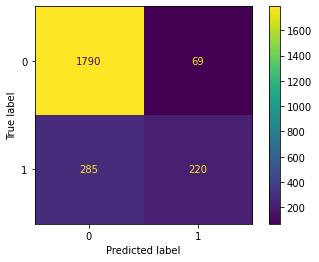

In [124]:
ConfusionMatrixDisplay.from_predictions(y_train, grid_svc.best_estimator_.predict(X_train_))
plt.show()

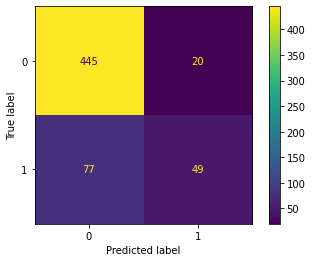

In [125]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_svc.best_estimator_.predict(X_test_))
plt.show()

## Model Analysis


Dalam kasus ini kita awalnya memilih 7 baseline model untuk melakukan klasifikasi target. Model yang dipilih adalah Logistic Regresion, Support Vector Clasifier, Decision Tree, Random Forest, KNN, Naive Bayes, dan Extreme Gradient Boosting. Pertama kita akan melakukan cross validation untuk menemukan model terbaik dari 7 model di atas berdasarkan cross validation scorenya. Kita menemukan ternyata model SVC memiliki score yang paling baik, model ini juga ternyata goodfit pada accuracy dan f1 scorenya, maka dari itu kita akan melakukan hyperparameter tuning pada model SVC menggunakan gridsearch.

Dari hasil gridsearch kita bisa lihat parameter terbaik untuk SVC yaitu menggunakan kernel `rbf`, dengan C = 1, degree = 2, dan gamma = 0.1. Kita bisa melihat score yang dihasilkan pada Train dan Test set lumayan bagus dan goodfit. SVC setelah dilakukan tuning menghasilkan nilai accuracy dan f1 score lebih tinggi pada Train Set jika dibandingkan dengan SVC baseline. Pada Test Set, model SVC hasil tuning ternyata menghasilkan accuracy dan f1 score yang lebih rendah dibandingkan baseline model.



Dalam kasus ini kita berusaha mencari orang yang gagal bayar credit card supaya bisa ditolak saat ingin mengajukan pinjaman, dengan kata lain kita akan fokus ke false negatif label 1 dimana seharusnya dia gagal bayar namun kita klasifikasikan mampu bayar sehingga bisa merugikan perusahaan kartu kredit jika ada customer yang tidak bisa bayar. Model SVC hasil tuning kita ternyata memperoleh hasil yang kurang bagus pada recall label 1 yaitu 0.44 pada Train Set dan 0.39 pada Test Set. Hal tersebut menurut saya disebabkan oleh imbalance data pada target dimana label 0 hanya berjumlah 21.4% dari keseluruhan data.

# 9 - Model Inference

## Inferencing

Sebelum melakukan evaluasi pada Inference Set, kita akan melakukan tahapan preprocessing yang sama dengan yang dilakukan pada Test-Set. Kita akan menggunakan hasil gridsearch yang didalamnya sudah terdapat pipeline untuk preprocess dan juga model hasil tuning.

In [ ]:
# Memilih fitur yang akan digunakan
data_inf_ = data_inf.drop(columns=['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'])


In [129]:
# Memisahkan Numerical Columns dan Categorical Columns Data Inference

data_inf_num = data_inf[num_cols]
data_inf_cat = data_inf[cat_cols]

In [133]:
# Menggabungkan num columns dan cat columns
data_inf_final = pd.concat([data_inf_num, data_inf_cat], axis=1)
data_inf_final

,limit_balance,age,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,420000.0,32.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,2,2,2,0.0,0.0,0.0,0.0,0,0
1,30000.0,25.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,2,2,2,2.0,0.0,0.0,0.0,0,0
2,40000.0,60.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,2,3,1,0.0,0.0,0.0,0.0,0,0
3,70000.0,39.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,2,3,3,0.0,0.0,-1.0,0.0,-1,0
4,60000.0,24.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,2,2,2,-1.0,0.0,-1.0,0.0,0,0
5,300000.0,30.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,2,1,1,0.0,0.0,0.0,0.0,0,0
6,500000.0,43.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1,1,2,0.0,0.0,0.0,-1.0,-1,-1
7,490000.0,30.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,2,2,1,0.0,0.0,0.0,0.0,0,-1
8,80000.0,26.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,1,1,2,1.0,2.0,2.0,0.0,0,0
9,130000.0,34.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,2,2,1,2.0,2.0,2.0,2.0,2,2


In [134]:
# melakukan predict pada inference set
y_pred_inf = grid_svc.best_estimator_.predict(data_inf_final)

In [135]:
# Membuat hasil prediksi menjadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['SVC_Tuned_Pred'])

In [136]:
pred_inf = pd.concat([data_inf['default_payment_next_month'], y_pred_inf_df], axis=1)
pred_inf

,default_payment_next_month,SVC_Tuned_Pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


In [137]:
print('----Inference Set----')
print(classification_report(data_inf['default_payment_next_month'], grid_svc.best_estimator_.predict(data_inf_final)))

----Inference Set----
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



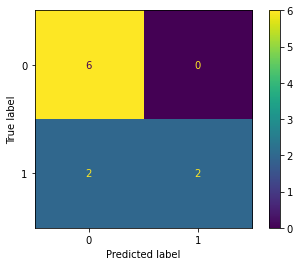

In [138]:
ConfusionMatrixDisplay.from_predictions(data_inf['default_payment_next_month'], grid_svc.best_estimator_.predict(data_inf_final))
plt.show()

Hasil evaluasi pada Inference-Set menunjukan hasil yang lumayan bagus secara accuracy. Model SVC hasil tuning menghasilkan nilai recall pada label 1 lebih tinggi dibandingkan dengan Train dan Test yaitu 0.50, namun hal tersebut dikarenakan dalam inference set hanya terdapat sedikit label 1. Model kita berhasil memprediksi 2 orang yang gagal bayar namun model kita juga mengklasifikasikan 2 orang sebagai mampu bayar padahal sebenarnya gagal bayar.

# 10 - Kesimpulan

Dataset kali ini berisi data pengguna kartu kredit di Taiwan. Target dari dataset kita ini adalah apakah pengguna gagal bayar bulan depan atau tidak. Data ini berisi umur, jenis kelamin, tingkat pendidikan, status pernikahan, status pembayaran, jumlah tagihan, dan jumlah pembayaran. Kita bisa melihat bahwa rata-rata pengguna kartu kredit di Taiwan berumur 35 tahun dimana umur tertuanya adalah 69 tahun yang artinya di Taiwan pengguna kartu kredit sampai orang yang sudah tua. Kita juga mengetahui ternyata mayoritas orang Taiwan yang menggunakan kartu kredit adalah lulusan sarjana, dimana kebanyakan dari mereka berstatus single dan belum menikah. Kita bisa melihat pengguna kartu kredit di Taiwan memiliki limit kredit yang beragam, dimana limit terkecil adalah 10.000 dollar Taiwan dan yang tertinggi adalah 800.000 dollar Taiwan.

Kita melakukan perhitungan korelasi antar kolom untuk melihat hubungan antar kolom. Hasil perhitungan menunjukan bahwa semua kolom memiliki pengaruh terhadap mampu atau tidaknya orang membayar tagihan bulan depan kecuali kolom jumlah tagihan. Ada 2 kolom yang korelasinya lumayan tinggi pada target yaitu kolom limit kartu kredit dan status pembayaran. Namun karna terlalu sedikit yang berkolerasi maka kita akan menggunakan semua kolom kecuali kolom jumlah tagihan. 

Saya memilih untuk menggunakan 7 model baseline untuk melakukan klasifikasi kali ini. Model yang dipilih adalah Logistic Regresion, Support Vector Clasifier, Decision Tree, Random Forest, KNN, Naive Bayes, dan Extreme Gradient Boosting. Setelah melakukan cross validation saya menemukan model SVC memiliki score yang tertinggi, maka dari itu akan dilakukan model tuning terhadap model tersebut. 

Model SVC hasil tuning menggunakan gridsearch berhasil mendapatkan nilai accuracy dan f1 score yang lebih tinggi pada Train Set, namun nilai accuracy dan f1 scorenya sedikit lebih rendah pada Test Set dibandingkan dengan baseline model. Model hasil tuning ini masih terbilang goodfit karena gap antara train dan test tidak terlalu jauh. Dalam inference set pun model kita mendapatkan accuracy yang cukup tinggi. Meskipun terbilang bagus namun model kita kurang bisa menangani kasus ini dikarenakan adanya imbalance data. Model kita seharusnya mampu mendapatkan nilai recall pada label 1 yang lebih tinggi untuk mengklasifikasikan orang gagal bayar, namun karena label 1 jumlahnya hanya sedikit sehingga model kita kurang maksimal dalam mengklasifikasikan label 1(gagal bayar).

**Saran** :

Model SVC ini sudah bagus dan goodfit, namum kurang memuaskan karena adanya imbalance data. Untuk selanjutnya jika imbalance data sudah dihandling saya yakin hasilnya akan jauh lebih baik. 

# 11 - Pertanyaan

## Soal 1

Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Criterion merupakan salaah satu parameter untuk mengukur suatu split pada decision tree, contohnya adalah `gini` atau lengkapnya `gini impurity` adalah metric pengukuran dimana besaranya dari 0-0.5 dimana lebih kecil lebih baik/lebih pure. Gini mengukur kemungkinan/probabilitas terjadinya salah klasifikasi pada sebuah split.



## Soal 2

Apakah fungsi dari pruning pada Tree model?

Decision Tree adalah model yang cenderung overfit, karena itu perlu dilakukan hyperparameter tuning atau pruning seperti mengatur min sample, max depth, atau cost complexity pruning. Jadi fungsi pruning adalah untuk mengatasi overfit pada model decision tree.

## Soal 3

Bagaimana cara memilih K yang optimal pada KNN?

Kita bisa memilih K yang optimal dengan cara mencoba-coba karena berbeda dataset, berbeda juga K yang optimal, kita mungkin bisa melakukan elbow method untuk menemukan K yang optimal.

## Soal 4

Jelaskan apa yang kalian ketahui tentang Cross Validation!

Cross Validation merupakan suatu metode pengujian yang digunakan untuk mendapatkan hasil model yang terbaik dengan cara melakukan percobaan sebanyak n kali pada suatu model.

## Soal 5

Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score

* Accuracy adalah rasio jumlah prediksi benar(positif dan negatif) dengan jumlah keseluruhan data. -- (TP + TN ) / (TP+FP+FN+TN)
* Precision adalah rasio jumah prediksi true positif dengan jumlah seluruh hasil yang positif. -- (TP) / (TP+FP)
* Recall adalah rasio  jumlah prediksi true positif dibandingkan dengan keseluruhan data yang benar positif. -- (TP) / (TP + FN)
* F1 Score adalah perbandingan rata-rata precision dan recall. -- 2 * (Recall*Precission) / (Recall + Precission)

